#Nosso primeiro exercicio com redes convolucionais 

In [1]:
#### Versão de tensorflow 1.0
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
#carregando a base de dados
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
#Bibliotecas de operações
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import numpy as np
from matplotlib import pyplot as plt
from keras.utils import np_utils
import cv2
import os

from keras import backend as K



%matplotlib inline

seed = 7
np.random.seed(seed)

#Bom, agora vamos a explicar nossas imagens são de 8 bits de 256 pixels e 28*28
o reshape de keras passa as imagens desse jeito 1, 28, 28
para normalizar dividimos por 255 0-255


In [18]:
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    x_train = x_train.reshape(x_train.shape[0], 1, 28, 28).astype('float32')

    x_test = x_test.reshape(x_test.shape[0], 1, 28, 28).astype('float32')

    x_train = x_train / 255
    x_test = x_test / 255

    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    
    return x_train, y_train, x_test, y_test

# escolhi essa configuração lembrem que ja tem  redes prontas esta é nossa

In [19]:
x_train, y_train, x_test, y_test = load_data()
num_classes = y_test.shape[1]

# O model será exportado para este arquivo
filename='mnistneuralnet.h5'


def model():
    model = Sequential()

    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu', data_format='channels_first'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(15, (3, 3),input_shape=(1, 28, 28),  activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout(0.2))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))

    model.add(Dense(64, activation='relu'))

    model.add(Dense(32, activation='relu'))

    model.add(Dense(num_classes, activation='softmax', name='predict'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [20]:
x_train.shape

(60000, 28, 28, 1)

In [21]:
model = model()
model.summary()

# Verifica se já existe um modelo treinado e exportado para um arquivo .h5.
# Um novo modelo será treinado, caso este arquivo não exista.
if not os.path.exists('./{}'.format(filename) ):
    model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=200)
    model.save_weights(filename)
else:
    # carrega um modelo previamente treinado
    model.load_weights('./{}'.format(filename) )

ValueError: ignored

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("\nacc: %.2f%%" % (scores[1]*100))


acc: 96.21%


7  com confiança de  43.52%


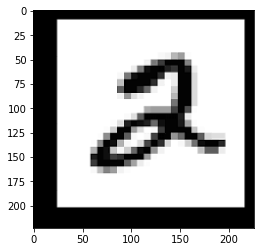

In [ ]:
img_pred = cv2.imread("number-two.png", 0)
plt.imshow(img_pred, cmap='gray')

if img_pred.shape != [28,28]:
    img2 = cv2.resize(img_pred, (28, 28))
    img_pred = img2.reshape(28, 28, -1)
else:
    img_pred = img_pred.reshape(28, 28, -1)

img_pred = ~img_pred
img_pred = img_pred.reshape(1, 1, 28, 28).astype('float32')

img_pred = img_pred/255.0


pred = model.predict_classes(img_pred)
pred_proba = model.predict_proba(img_pred)
pred_proba = "%.2f%%" % (pred_proba[0][pred]*100)
print(pred[0], " com confiança de ", pred_proba)
